In [1]:
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import numpy as np

from generation.data.data_preparation import get_attributes_df, \
                                             get_event_detector_df, \
                                             generate_one_signal, \
                                             postprocess_signal

In [2]:
df = get_attributes_df()
df = get_detector_event_df(df, detector=4)

In [3]:
unique_events = df['event'].unique()
events_dfs = [df[df['event'] == int(event)] for event in tqdm.tqdm(unique_events)]

100%|██████████| 74/74 [00:28<00:00,  2.57it/s]


In [4]:
events_signals = [generate_one_signal(event_df, signal_dim=1024, sample_coef=1) for event_df in tqdm.tqdm(events_dfs)]
events_postprocessed_signals = [postprocess_signal(signal) for signal in tqdm.tqdm(events_signals)]

100%|██████████| 74/74 [03:56<00:00,  3.20s/it]


In [5]:
def get_baseline_prediction(signal):
    half_amplitude = np.min(signal) + (np.max(signal) - np.min(signal)) / 2
    prev = signal[0]
    for idx, item in enumerate(signal):
        if item > half_amplitude:
            return idx

In [6]:
preds = [get_baseline_prediction(signal) for signal in events_postprocessed_signals]

In [7]:
preds

[66,
 67,
 67,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 67,
 66,
 67,
 66,
 66,
 66,
 66,
 67,
 66,
 66,
 66,
 67,
 66,
 66,
 67,
 67,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 67,
 66,
 66,
 66,
 67,
 67,
 66,
 66,
 66,
 66,
 66,
 67,
 66,
 67,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 67,
 66,
 66,
 66,
 66,
 66,
 67,
 67,
 66,
 94]

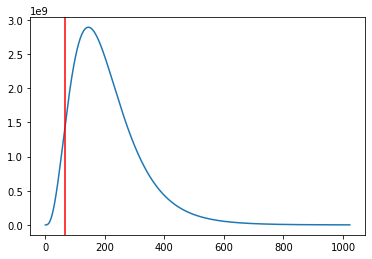

In [8]:
plt.plot(events_postprocessed_signals[0])
plt.axvline(x=preds[0], color='red')
plt.show()

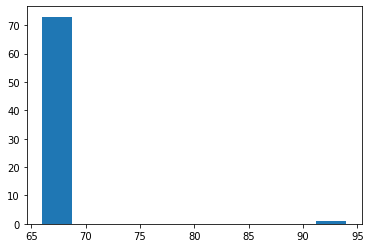

In [9]:
plt.hist(preds)
plt.show()